# **Introduction:**
In this project, we have a small dataset ( [from kaggle](https://kaggle.com)) of 1000 observations collected from students performances in three exams and their 5 features, some of these features are inherited, that means the student have no power to change any of them like gender ethnicity and parental level of eduction and other acquired feature like kind of lunch and test preparation.  
In our analysis we try to find  corelation between the features level and the performance, and which features are the more importante, so may helps students improve their perfomance and /or take care of weak performance students.
Although the dataset is quite clean, i did make some data clean up just for learning and practice purpose. 
In the analysis section i checked out the dataset balancing, data discription (statistical metrics), claculation of some sub dataset means and columns filtrering.   
For the viusualisation i used pie chart to show the categorical features (gender and race/ethnicity) and bar plot for mean and  scores performances, Box plot for all features and all scores.
In test module i used mannwhitneyu and scipy.stats libraries and run test upon some features that I have some doubt about them to confirm what we figure out from graphs.
Finally i used Random Forest Classifier and Support Vector Machine  libraries to perfom somme predictions and to classify features importance.
# *Note:*
In order to use the main module from jupyter lab or google colab you should run all other cells before runing this main module.
enjoy.



# Main Module:  
This module perfomrs pre-analys work and prepares dataset and then ask the user what action he would like to do.

|            StudentBAP             |
|    Student Background Analysis    |
|    Coppy right Kamel Haoua 2021   |
|                                   |
Initializing dataset...

Reading dataset ok
Process missing and or wrong values..
--------------------------------------------------------
Correcting columns names..
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score'], dtype='object')
Replacing  wrong values with null..


column gender  data type object
column race_ethnicity  data type object
column parental_level_of_education  data type object
column lunch  data type object
column test_preparation_course  data type object
column math_score  data type int64
column reading_score  data type int64
column writing_score  data type int64
---------------------------------------------------------
columns check finish, ok.
Replacing numeric null values with mean
Ok, replacement done
Removing rows wi

action:  graph


executing action: graph
Please wait this action may take a while... 
Graphic module


Please make a choice:
Enter 1 for categorical variables
Enter 2 for extrem scores
Enter 3 for Mean graph
Enter 4 for box graph
Enter 5 for all score for each feature
Press enter key to cancel
 1


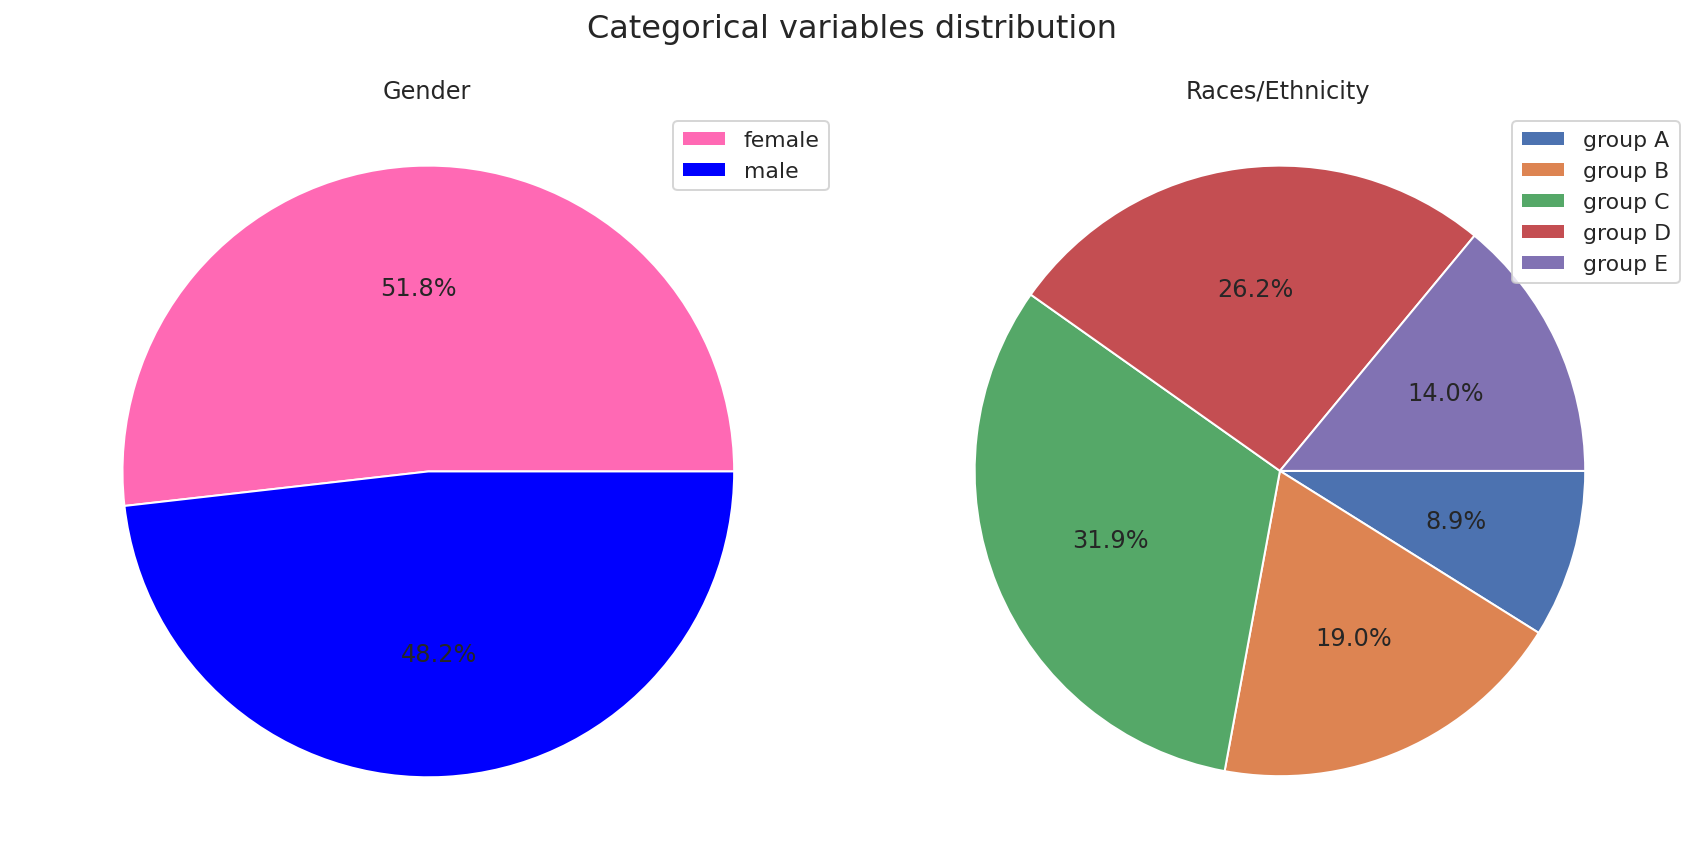

------------------------------------------------------------------------


In [8]:
""" 
Studentbap Main Module as command line interface
"""
import pandas as pd
import sys
import os.path
import numpy as np
""""
import analysisbap
import graphicbap
import mlbap
import testbap
"""
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 500)

actions = ['analys','graph','test','ml']
action = None
ds = None
dataset_path='data/StudentsPerformance.csv'
env=get_ipython().__class__.__name__
"""
In order to run script from terminal we create this main method in each module
"""
def main() :
    
    print('=====================================')
    for i in range(6) :
        if i==3 :
            print('|            StudentBAP             |')
            print('|    Student Background Analysis    |')
            print('|    Coppy right Kamel Haoua 2021   |')
            print('|                                   |')
    print('=====================================')
    print('Initializing dataset...')
    print()
    load_dataset()
    cleanup_dataset(num_columns = ds[['math score','reading score','writing score']].columns)
    datasetInfos()
    action = get_user_action()
    if ((action == None) or (len(action) == 0)):
        print('Sorry i can\'t understand your action,! see you next time.')
        exit()
    elif action == 'exit':
        return
    else:
        execute_action(action)
"""
Load dataset from path (data/StudentsPerformance.csv)
if file path not exists it stops the execution of script
"""        
def load_dataset():
    global ds
    if (os.path.exists(dataset_path)):
        ds = pd.read_csv(dataset_path)
        print('Reading dataset ok')
    else:
        print('file '+dataset_path+' doesn\'t exits. Please check file system and try agin later.' )    
        return

#display help how to use scripts
def show_help():
    print('usage :\n'+ \
    'action \n'+ \
    '\n'+ \
    'Where action is one of the following:\n'+ \
    'analys: perfom all statistical analysis.\n'+ \
    'graph: display graphics and plots\n'+ \
    'test: run statistical tests\n'+ \
    'ml: make a prediction and show features importance classification\n'+ \
    'exit: stop script\n')
    
#Prompts user for action he wants to perfom and return user std input text
def get_user_action():
    print('Type help or any action.?')
    print()
    maxtry=3;
    while(maxtry>0):
        action = input("action: ")
        if ((action is None) or len(action) == 0 ):
            print ('No action specified!. type help or shoose one action: \n'+', '.join(actions))
            print()
        elif ((action in actions) or (action == 'exit')) :
            return action;
        elif action == 'help' :
            show_help() 
        else:
            print('Unknown action. "'+action+'"\n'+'type help or choose one action: \n'+', '.join(actions))
            print()
        if maxtry == 0 :
            return None;
        else:
            maxtry-=1;
                
#Execute initiation methods and execute one action                
def execute_action(act=None):
    
    if(act=='exit') :
        print('stoping script... good bye.')
        return  
    else :  
        print('executing action: '+str(act)+'\nPlease wait this action may take a while... ')
        if env == 'TerminalInteractiveShell' : # execution from terminal we call secripts main method
            if act=='analys' :
                analysbap.main()
            elif act=='graph' :
                graphicbap.main() 
            elif act=='test' :
                testbap.main() 
            elif act=='ml' :
                mlbap.main()
            else:
                print('Unknown action: ('+str(act)+')')    
        else : # execution from notebook we call methods in this notebook
            if act=='analys' :
                check_data_balancing('gender')
                check_data_balancing('race_ethnicity')
                analysis()
            elif act=='graph' :
                select_graph() 
            elif act=='test' :
                run_all_tests()
            elif act=='ml' :
                init_ml()
                start_ml()
            else:
                print('Unknown action: ('+str(act)+')')
            

# verify dataset

"""
 if there is a missing or wrong values we have to process each column depending on its data type
 if data type is not numeric we remove the row from dataset, if is nemuric we replace
 non conform values with NaN and replace NaN values with the mean of that column
"""
def cleanup_dataset(num_columns=None) :
    print('Process missing and or wrong values..')
    print('--------------------------------------------------------')
    
    #some column names contain white-space and back slash character, 
    #so we have to replace it with underscore character(_).

    print('Correcting columns names..')
    ds.columns=ds.columns.str.replace(' ','_')
    ds.columns=ds.columns.str.replace('\/','_')
    columns= ds.columns

    print(columns)
    print('Replacing  wrong values with null..')
    if(num_columns is None):
        num_columns=ds.select_dtypes(include='int64')
        print()
                
        for nc in num_columns :
            ds[nc]=ds[nc].apply(lambda x : np.nan if str(type(x))=="<class 'str'>" else x)
    print('\n')
    print('Collecting columns having a null values..')  

    column_with_null_value=list()
    
    for column in columns :
        datatype=ds[column].dtype
        print('column '+column+'  data type '+str(datatype))
        if (ds[column].isnull().values.any==True):
            column_with_null_value.append(column)   
    print('---------------------------------------------------------')
    
    if len(column_with_null_value)==0:
        print('columns check finish, ok.')
    else :
        print('some columns have null values\n')
        print(column_with_null_value)   
    print('Replacing numeric null values with mean')
    replcement_values={}
    if(len(column_with_null_value)>0) :
        for c in column_with_null_value :
            if(c in num_columns) :
                meanvalue=ds[c].mean(skipna=True)
                replcementValues[c]=meanvalue
    ds.fillna(value=replcement_values, inplace=True)
    print('Ok, replacement done')
    print('Removing rows with null categorical values')
    ds.dropna(inplace=True)
    print('Ok,  Removing done')
    print('\n')

"""
Dataset discritption
"""
def datasetInfos() :
    if(os.path.exists(dataset_path)) :
        print('File size: ')
        print(os.stat(dataset_path).st_size)
    if ds is None :
        print('No data available yet !.')
        exit()
    else :    
        print('Dataset shape rows (count x comluns count):')
        print(ds.shape)
        print()
        print('Columns names:')
        print(ds.columns)
        print()
        print('Numeric columns:')
        print(ds.select_dtypes(include='int64').columns)
        print()
        print('Statistics:')
        print(ds.describe())

#execute the main program

if __name__ == '__main__':
    main()



# Analysis:
* Data balancing check:  
check if the data is balanced:
In this dataset we have two columns gender and race/ethnicity that are
categorical variable, they should have the same number of values for each category (eg. 500 men and 500 women) or not less than 90% and not greater than 10% of normal count (normal_count equals total observations divided by unique values )

* Data analysis:  




In [ ]:
"""
Module analys perfoms statistical Analysis
"""
import sys

import pandas as pd

"""
"""
def main():
    check_data_balancing('gender')
    check_data_balancing('race_ethnicity')
    analysis()
    
def check_data_balancing(cat_column=None) :
    print('Data balancing check for column '+cat_column)
    print()
    if cat_column  is None :
        print('None categorical column')
        pass
    
    unique_count = ds[cat_column].nunique()
    ds_size = ds[cat_column].size
    grouped_ds=ds.groupby(by=cat_column)
    normal_count=ds_size/unique_count
    print('Normal count for column '+cat_column+' = '+str(normal_count))
    real_count=grouped_ds.size()
    print('values count in each category '+cat_column)
    print(real_count.to_string())
    is_balanced=True
    
    for count in real_count :
        ratio = count / normal_count
        if (count / normal_count) > 1.1 :
            is_balanced=False
            break
           
    if is_balanced:
         print('Sample for category '+cat_column+' is balanced')
    else:
         print('Sample for category '+cat_column+' is not balanced, ' \
               +'because some group contain more than 90% of the total values of culumn '+cat_column)
    print('---------------------------------------------------')
    
def analysis():
    print('Data analysis')
    if ds is None:
        print('Dataset no available')
        return
    else:
       
        print('Find min / max values')
        print()
        print('Student''s gender who get <= 20% math score')
        ds_less_20=ds[ds['math_score']<=20][['gender','race_ethnicity']] \
              .groupby(by=['race_ethnicity','gender']).size()
        print(pd.DataFrame({'count':ds_less_20}).reset_index())
        print()
        print('Student''s gender who get >=80% math score')
        ds_greater_80=ds[ds['math_score']>=80][['gender','race_ethnicity']]\
              .groupby(by=['race_ethnicity','gender']).size()
        print(pd.DataFrame({'count':ds_greater_80}).reset_index())
        print()
                
        print('Dataset discription:')
        print(ds.describe())
        print()    
        print('Calculating means for each feature...')
        print()
        print('Mean by gender')
        print(ds.groupby(ds['gender']).mean())
        print()
        print('Mean by race/ethnicity')
        print(ds.groupby(ds['race_ethnicity']).mean())
        print()
        print('Mean by parental level of eductaion')
        print(ds.groupby(ds['parental_level_of_education']).mean())
        print()
        print('Mean by lunch')
        print(ds.groupby(ds['lunch']).mean())
        print()
        print('Mean by test preparation course')
        print(ds.groupby(ds['test_preparation_course']).mean())
        print('--------------------------------------------------')

if __name__ == '__main__':
    main()

           

# **Analys reuslts**
* Data balancing:  
The column race/ethnicity holds  5 groups of students and the number in each group is sginficantely far from normal number that is 200 , thus we don't expect an accurate results later in prediction and classification because they affect the mean and the varaince as well.
* Analysis:  
1. We see some outlier values like 0, but they are not due 
to mistakes because they are also equivalent in all scores, so these values could affect the mean because there are only three values below score 20 in math exam, removing these values could yield more accurate results.
2. Females are good in writing and reading but males are good than females in math.
3. There are some diffrence between groups of races the best one is gruop E and the weak one is group A in all scores.
4. Students who toke a standard lunch have better performance than other.
5. Test preparation course  also made difference.  

**Note:**  
These findings are based only on means, so we have to see what is the in graphs for better unsersanding what really make a diffrence. 




# **Graphics**
*   **Categorical variables:**  
We have a two principal categorical features, gender and race/ethnicity, in this plot we could see how the dataset is blanaced, that mean if we have nearly equivalents numbers of each category.
*   **Extrem Scores:**  
Above 80 and under 20 scores to find out how much extrem values we have and understand if they affectting  the mean for categorical values.
*   **Mean Graph**  
Mean score for each feature could give us an idea about if there some diffrence between categories regarding the given feature  
*   **Box Graph:**
To show some metrics variables like max, min, outliers, median and variance for each feature and each scores.  
 
*  **All score for each features:**  
This graph show all scores grouped by each features.



In [6]:
"""
Module graphics
"""
from matplotlib import pyplot as plt
import seaborn as sns
import sys

#plt.rcParams["figure.figsize"] = [16, 16]
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="whitegrid")

def main():
    select_graph()
      
def select_graph():
    #ask user which graph or print pass
    print('Graphic module')
    choice=input('Please make a choice:\n' \
              +'Enter 1 for categorical variables\n' \
              +'Enter 2 for extrem scores\n' \
              +'Enter 3 for Mean graph\n' \
              +'Enter 4 for box graph\n' \
              +'Enter 5 for all score for each feature\n' \
              +'Press enter key to cancel\n' )
  
    if (not choice):
        return
    else:
        if (choice=='1'):
            categorical_variables()
        elif (choice=='2') :
            extreme_scores()
        elif (choice=='3') :
            mean_graph()
        elif (choice=='4') :
            box_graphs()
        elif (choice=='5') :      
            allscores_for_ech_feature()
        else: 
            return
    
def categorical_variables():
    # 1) Categorical variables distribution
    #Gender 
    genders= ds.gender.value_counts().to_dict()
    races= pd.DataFrame(sorted(ds.race_ethnicity.value_counts().to_dict().items()), columns=['race_ethnicity','count'])
    
    #print(pd.DataFrame(sorted(races.items()), columns=['races','count']))
    #print(pd.DataFrame({'count':ds.race_ethnicity.value_counts()}).reset_index().sort_values(['index']))

    fig, ax=  plt.subplots(nrows=1,ncols=2, figsize=[12,6])
        
    ax[0].pie(x=genders.values(),data=genders, labels=['']* len(genders.keys()),colors=['hotpink','blue'], autopct='%1.1f%%')
    ax[0].axis('equal')
    ax[0].set_title('Gender')
    ax[0].legend(genders.keys())
    
    #Race/Ethnicity
    ax[1].pie(x=(races['count']),data=(races), labels=['']* len(races.race_ethnicity), autopct='%1.1f%%', counterclock=False)
    ax[1].axis('equal')
    ax[1].set_title('Races/Ethnicity')
    ax[1].legend(races['race_ethnicity'])
    
    fig.patch.set_facecolor('white')
    fig.suptitle('Categorical variables distribution',fontsize=16)
    fig.subplots_adjust(top=0.88)
    fig.tight_layout()
    plt.show()
    print('------------------------------------------------------------------------')
    
def extreme_scores():
    fig, ax=  plt.subplots(nrows=3,ncols=2, sharey=False, figsize=[16,16])
    fig.suptitle('Extreme scores grouped by races and then by gender', fontsize=16)
    # math score
    #------------------------------------------------------------------------------------
    math_less_20=ds.loc[ds['math_score']<=20].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    math_df_20=pd.DataFrame({'counts':math_less_20}).reset_index()
    sns.barplot(ax=ax[0,0],palette=['hotpink','blue'], data=math_df_20, x='race_ethnicity', y='counts',hue='gender')
    ax[0,0].set_title('Under 20 math score')
    
    math_greater_80=ds.loc[ds['math_score']>=80].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    math_df_80=pd.DataFrame({'counts':math_greater_80}).reset_index()
    sns.barplot(ax=ax[0,1],palette=['hotpink','blue'], data=math_df_80, x='race_ethnicity', y='counts',hue='gender')
    ax[0,1].set_title('Above 80 math score')
    
    # reding score
    #--------------------------------------------------------------------------------
    read_less_20=ds.loc[ds['reading_score']<=20].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    read_df_20=pd.DataFrame({'counts':read_less_20}).reset_index()
    sns.barplot(ax=ax[1,0],palette=['hotpink','blue'], data=read_df_20, x='race_ethnicity', y='counts',hue='gender')
    ax[1,0].set_title('Under 20 reading score')
    
    read_greater_80=ds.loc[ds['reading_score']>=80].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    read_df_80=pd.DataFrame({'counts':read_greater_80}).reset_index()
    sns.barplot(ax=ax[1,1],palette=['hotpink','blue'], data=read_df_80, x='race_ethnicity', y='counts',hue='gender')
    ax[1,1].set_title('Above 80 reading score')    
    #--------------------------------------------------------------------------------
    # writing score
    
    write_less_20=ds.loc[ds['writing_score']<=20].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    write_df_20=pd.DataFrame({'counts':write_less_20}).reset_index()
    sns.barplot(ax=ax[2,0],palette=['hotpink','blue'], data=write_df_20, x='race_ethnicity', y='counts',hue='gender')
    ax[2,0].set_title('Under 20 writing score')
    
    write_greater_80=ds.loc[ds['writing_score']>=80].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    write_df_80=pd.DataFrame({'counts':write_greater_80}).reset_index()
    sns.barplot(ax=ax[2,1],palette=['hotpink','blue'], data=write_df_80, x='race_ethnicity', y='counts', hue='gender')
    ax[2,1].set_title('Above 80 writing score')
    
    plt.show()

def mean_graph():
    fig, ax = plt.subplots(nrows=3,ncols=2, sharey=False, figsize=[25,25])
    ax[-1, -1].axis('off')
    fig.suptitle('Means grouped by categorical variables', fontsize=16)
        
    by_gender= ds.groupby(ds['gender']).mean().reset_index()
    by_gender=by_gender.melt('gender',var_name='means',value_name='score_means')
    sns.barplot(ax=ax[0,0], data=by_gender, x='gender', y='score_means',hue='means')
    ax[0,0].set_title('mean by gender')
        
    by_race= ds.groupby(ds['race_ethnicity']).mean().reset_index()
    by_race=by_race.melt('race_ethnicity',var_name='means',value_name='score_means')
    sns.barplot(ax=ax[0,1], data=by_race, x='race_ethnicity', y='score_means',hue='means')
    ax[0,1].set_title('mean by race_ethnicity')
        
    by_ple=ds.groupby(ds['parental_level_of_education']).mean().reset_index()
    by_ple=by_ple.melt('parental_level_of_education',var_name='means',value_name='score_means')
    sns.barplot(ax=ax[1,0], data=by_ple, x='parental_level_of_education', y='score_means',hue='means')
    ax[1,0].set_title('mean by parental_level_of_education') 
    ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=15)   
       
    by_lunch=ds.groupby(ds['lunch']).mean().reset_index()
    by_lunch=by_lunch.melt('lunch',var_name='means',value_name='score_means')
    sns.barplot(ax=ax[1,1], data=by_lunch, x='lunch', y='score_means',hue='means')
    ax[1,1].set_title('Mean by lunch type')    
       
    by_tpc=ds.groupby(ds['test_preparation_course']).mean().reset_index()
    by_tpc=by_tpc.melt('test_preparation_course',var_name='means',value_name='score_means')
    sns.barplot(ax=ax[2,0], data=by_tpc, x='test_preparation_course', y='score_means',hue='means')
    ax[2,0].set_title('Mean by test_preparation_course') 
    #plt.tight_layout()
    plt.legend(loc='best')
    plt.show()
    
def box_graphs():
    fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[40,40])
    fig.suptitle('Grouped by features and scores', fontsize=16)
        
    sns.boxplot(ax=ax[0,0],y='gender',x='math_score', data=ds, palette=['hotpink','blue'])
    sns.boxplot(ax=ax[0,1],y='gender',x='reading_score', data=ds, palette=['hotpink','blue'])
    sns.boxplot(ax=ax[0,2],y='gender',x='writing_score', data=ds, palette=['hotpink','blue'])
    
    sns.boxplot(ax=ax[1,0],y='race_ethnicity',x='math_score', data=ds)
    sns.boxplot(ax=ax[1,1],y='race_ethnicity',x='reading_score', data=ds)
    sns.boxplot(ax=ax[1,2],y='race_ethnicity',x='writing_score', data=ds)
    
    sns.boxplot(ax=ax[2,0],y='parental_level_of_education',x='math_score', data=ds)
    sns.boxplot(ax=ax[2,1],y='parental_level_of_education',x='reading_score', data=ds)
    sns.boxplot(ax=ax[2,2],y='parental_level_of_education',x='writing_score', data=ds)
    
    sns.boxplot(ax=ax[3,0],y='lunch',x='math_score', data=ds)
    sns.boxplot(ax=ax[3,1],y='lunch',x='reading_score', data=ds)
    sns.boxplot(ax=ax[3,2],y='lunch',x='writing_score', data=ds)
    
    sns.boxplot(ax=ax[4,0],y='test_preparation_course',x='math_score', data=ds)
    sns.boxplot(ax=ax[4,1],y='test_preparation_course',x='reading_score', data=ds)
    sns.boxplot(ax=ax[4,2],y='test_preparation_course',x='writing_score', data=ds)
    
    
    plt.show() 
    
def all_scores_for_each_feature():
    fig, ax = plt.subplots(nrows=5, ncols=4, figsize=[40,40])
    plt.xticks(rotation=45)
    fig.suptitle('Mean and scores of three exams', fontsize=28)
    
    # Mean
    mean_perormance=ds.eval('(math_score + reading_score + writing_score)/3').rename('mean_perormance')
    sns.barplot(ax=ax[0,0], data=ds,y=mean_perormance , x='gender',palette=['hotpink','blue']).set_title('Mean for all scores', fontsize=18)
    sns.barplot(ax=ax[1,0], data=ds,y=mean_perormance , x='race_ethnicity')
    ple=sns.barplot(ax=ax[2,0], data=ds,y=mean_perormance , x='parental_level_of_education')
    ple.set_xticklabels(ple.get_xticklabels(),rotation=20)
    
    sns.barplot(ax=ax[3,0], data=ds,y=mean_perormance , x='lunch')
    sns.barplot(ax=ax[4,0], data=ds,y=mean_perormance , x='test_preparation_course')
   
    # Math score
    sns.barplot(ax=ax[0,1], data=ds,y='math_score' , x='gender',palette=['hotpink','blue']).set_title('Math score', fontsize=18)
    sns.barplot(ax=ax[1,1], data=ds,y='math_score' , x='race_ethnicity')
    sns.barplot(ax=ax[2,1], data=ds,y='math_score' , x='parental_level_of_education').set_xticklabels(ple.get_xticklabels(),rotation=30)
    sns.barplot(ax=ax[3,1], data=ds,y='math_score' , x='lunch')
    sns.barplot(ax=ax[4,1], data=ds,y='math_score' , x='test_preparation_course')
    
    # Reading score
    sns.barplot(ax=ax[0,2], data=ds,y='reading_score' , x='gender',palette=['hotpink','blue']).set_title('Reading score', fontsize=18)
    sns.barplot(ax=ax[1,2], data=ds,y='reading_score' , x='race_ethnicity')
    sns.barplot(ax=ax[2,2], data=ds,y='reading_score' , x='parental_level_of_education').set_xticklabels(ple.get_xticklabels(),rotation=30)
    sns.barplot(ax=ax[3,2], data=ds,y='reading_score' , x='lunch')
    sns.barplot(ax=ax[4,2], data=ds,y='reading_score' , x='test_preparation_course')
    
    # Writing scores
    sns.barplot(ax=ax[0,3], data=ds,y='writing_score' , x='gender',palette=['hotpink','blue']).set_title('Writing scores', fontsize=18)
    sns.barplot(ax=ax[1,3], data=ds,y='writing_score' , x='race_ethnicity')
    sns.barplot(ax=ax[2,3], data=ds,y='writing_score' , x='parental_level_of_education').set_xticklabels(ple.get_xticklabels(),rotation=30)
    sns.barplot(ax=ax[3,3], data=ds,y='writing_score' , x='lunch')
    sns.barplot(ax=ax[4,3], data=ds,y='writing_score' , x='test_preparation_course')
    
if __name__=="__main__":
    main()  


Graphic module


Please make a choice:
Enter 1 for categorical variables
Enter 2 for extrem scores
Enter 3 for Mean graph
Enter 4 for box graph
Enter 5 for all score for each feature
Press enter key to cancel
 


## **Graphs Results:**  
1. Categorical graph distribution:  
This graph show that data in gender feature is balanced, however in the race ethnicity feature is not.  
2. Extrem scores graph:  
This graph  shows our hypotesis about gender feature but not for race feature,it say that males are better than females in math and vis versa. but for race/ethnicity we found in our previous group E is better than all others but here it isn't.
3. Mean graph:  
* By gender: it shows our hypotesis, Male are better than females in math and females are better than males in other perfomances.
* Race / Ethnicity: it shows that there is a preponderance between all groups, the race E is better than others and group A is the weakest one.
* Parental level of educaction: There is some preponderance between all levels for reading and writing , the master degree is the best one and high school is the weakest one, however there is some simillarties in math in (master degree vs bachelor degree) and (some college vs associate degree), may be due to other factors like lunch or test preparation corse or race ethnicity. 
We somehow understand that the PLO is a bit relevant for students perfomance, so the parents may give some academic help or due to genetic inhertance.
although what we  we have to run some statistical test to clarify the relationship existnece.
* Lunch: the difference is about 10%, the standard lunch may increase performance in all scores.
* Test preparation course : the same as lunch but math score is about less than 10% diff.
4. Box graphs:  
This graph show us some metrical data like min, max  are the first and last vertical lines, outliers point outside the graph, median the vertical line inside the box also 50th percentile or 2nd quartile Q2, first quartile Q1 or 25% and third quartile Q3 or 75% are the  boxe's limites, if the median line is not close to the midle of the box that means the sample is not normal distribution, more the box is longer more the data variability is bigger. 
Interquartile range IQO is the box length or Q3 - Q 1.
This graph excludes outliers data points so it may correcte some weakness of mean beause this one is much affected by the outliers.

* Genders: the difference in math is not really signifcante about 5% or less, but in other scores it is clear that females are much better than males, however we have to examine these outliers values if not comes from mistakes.
* race/ethnicity: group E is the best in math with a bit difference in reading, while group A the weakest one in all scores.
* parental level of education: 
we could distinguishe two groups in math, first group are
High school and some high school are a bit simillar and it is the weakest group and second group is all others, how ever in reading and writing we could distinguish two groups in the second group the master degree and bachelor degree are the best ones.  
Although we could distinguish groups, the deiffreneces are not signifcante because of variability of scores.
* Lunch and test preparation course have  a clear difference. 

#  **Test statistic:** 
* Two-Way test  
This test takes two samples and compares their means and checks if they are significantelly different.  
Given an aplha value = 5%  of the sample as signifcance level and two-sided alternative , that means we test a possibility of corelation between a feature  level x and the label or target calss y in both directions, 2.5% each side  (less then and greater than 2.5%).  
If the test yields a p-value less than 0.05 we confirm the existance of the corelation or alternative hypothesis (Ha).
* One-Ways test:  
The main difference between the first one and this one is that this can take more than two samples or groups. If only one group is distinguishable from others the test passes or null hypothesis  will be rejected.
This test also could can take multiples input and produce test result (F,P) for each.



In [ ]:
"""
Running tests for each categorical variable:
We try to find out if there is a correlation between a given category of students
and any of the performances, so we have to filter out a category and compare them 
against each another.
"""
from scipy.stats import mannwhitneyu
import scipy.stats as stats
def main():
    run_all_tests()
    
def run_2ways_test(dist1,dist2):
    alpha = 0.05
    stat,pv = mannwhitneyu(dist1,dist2,alternative='two-sided')
    return pv < alpha
    
def run_all_tests():
    principal_columns=['math_score','reading_score','writing_score']
    
    males=ds[ds['gender']=='male'][principal_columns]
    females=ds[ds['gender']=='female'][principal_columns]   
    
    group_a=ds[ds['race_ethnicity']=='group A'][principal_columns]
    group_b=ds[ds['race_ethnicity']=='group B'][principal_columns]
    group_c=ds[ds['race_ethnicity']=='group C'][principal_columns]
    group_d=ds[ds['race_ethnicity']=='group D'][principal_columns]
    group_e=ds[ds['race_ethnicity']=='group E'][principal_columns]
    
    bachelor_degree=ds[ds['parental_level_of_education']=='bachelor''s degree'][principal_columns]
    master_degree=ds[ds['parental_level_of_education']=='master''s degree'][principal_columns]
    ass_degree=ds[ds['parental_level_of_education']=='associate''s degree'][principal_columns]
    somme_college=ds[ds['parental_level_of_education']=='some college'][principal_columns]
    high_school=ds[ds['parental_level_of_education']=='high school'][principal_columns]
    somme_high_school=ds[ds['parental_level_of_education']=='some high school'][principal_columns]
    
    
    
    print('---------Running  two-ways test:----------')
    print()
    print('---------Gender test:----------')
    print()
    math_test=run_2ways_test(males['math_score'],females['math_score'])
    writing_test=run_2ways_test(males['reading_score'],females['reading_score'])
    redaing_test=run_2ways_test(males['writing_score'],females['writing_score'])
    
    print('Male are '+('good than 'if math_test else 'equal with'  )+'females in math ')
    print('Females are '+('good than 'if writing_test else 'equal with '  )+'males in writing ')
    print('Females are '+('good than 'if redaing_test else 'equal with '  )+'males in reading ')
        
    print()
    print('---------Race/Ethnicity ---------')
    print()
    math_test=run_2ways_test(group_e['math_score'],group_d['math_score'])
    writing_test=run_2ways_test(group_e['reading_score'],group_d['reading_score'])
    redaing_test=run_2ways_test(group_e['writing_score'],group_d['writing_score'])
    
    print('Group E vs group D:')
    
    print('group E is '+('good than 'if math_test else 'similar with'  )+'group D in math ')
    print('group E is '+('good than 'if writing_test else 'similar with '  )+'group D in writing ')
    print('group E is '+('good than 'if redaing_test else 'similar with '  )+'group D in reading ') 
    print()
    print('Group D vs group C:')
    math_test=run_2ways_test(group_d['math_score'],group_c['math_score'])
    writing_test=run_2ways_test(group_d['reading_score'],group_c['reading_score'])
    redaing_test=run_2ways_test(group_d['writing_score'],group_c['writing_score'])
    
    print('group D is '+('good than 'if math_test else 'similar with'  )+'group C in math ')
    print('group D is '+('good than 'if writing_test else 'similar with '  )+'group C in writing ')
    print('group D is '+('good than 'if redaing_test else 'similar with '  )+'group C in reading ')
    print()
    print('---------Parental level of education test ---------')
    print()
   
    print('bachelor degree vs master degree:')
    math_test=run_2ways_test(bachelor_degree['math_score'],master_degree['math_score'])
    writing_test=run_2ways_test(bachelor_degree['reading_score'],master_degree['reading_score'])
    redaing_test=run_2ways_test(bachelor_degree['writing_score'],master_degree['writing_score'])
    print('master degree is '+('good than 'if math_test else 'similar with'  )+'bachelor degree in math ')
    print('master degree is '+('good than 'if writing_test else 'similar with '  )+'bachelor degree in writing ')
    print('master degree is '+('good than 'if redaing_test else 'similar with '  )+'bachelor degree in reading ')
    print()
    
    print('associate degree vs some college:')
    math_test=run_2ways_test(ass_degree['math_score'],somme_college['math_score'])
    writing_test=run_2ways_test(ass_degree['reading_score'],somme_college['reading_score'])
    redaing_test=run_2ways_test(ass_degree['writing_score'],somme_college['writing_score'])
    print('associate degree is '+('good than 'if math_test else 'similar with'  )+'some college in math ')
    print('associate degree is '+('good than 'if writing_test else 'similar with '  )+'some college in writing ')
    print('associate degree is '+('good than 'if redaing_test else 'similar with '  )+'some college in reading ')
    print()
    
    print('some high school vs high school:')
    math_test=run_2ways_test(high_school['math_score'],somme_high_school['math_score'])
    writing_test=run_2ways_test(high_school['reading_score'],somme_high_school['reading_score'])
    redaing_test=run_2ways_test(high_school['writing_score'],somme_high_school['writing_score'])
    print('some high school is '+('good than 'if math_test else 'similar with '  )+'high school in math ')
    print('some high school is '+('good than 'if writing_test else 'similar with '  )+'high school in writing ')
    print('some high school is '+('good than 'if redaing_test else 'similar with '  )+'high school in reading ')
    print()
    
    print()
    print('---------Running  one-ways ANOVA test (black box test):----------')
    print()
    print('---------race_ethnicity test---------')
    print()
    
    f,p =stats.f_oneway(group_a, group_b, group_c, group_d ,group_e)
    dic={'scores':principal_columns, 'F values':f, 'P values':p, 'it\'s ok':f>p}
    print(pd.DataFrame(dic))
    print()
    
if __name__ == '__main__':
    main()


# Machine Learning

In this module we gonna be using RandomForestClassifier to predict scores and to classify features importance.

*   Transform categorical variable into numeric values using OneHotEncoder/OrdinalEncoder
I have OneHotEncoder because it create a binary columns for each category in all features as result we end up with 17 columns of true/false like, 0 for false and 1 for true, thus we can't see which features are more imortant.
*   Devide  dataset into two subdatasets (80/20 %) one for training the model and other for testing.
*   Perfom prediction 
*   Find out features importance.


In [ ]:
"""
Module Machine learning RandomForestClassifier
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
import sys
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 500)

def main():
    init_ml()
    start_ml()
    
def start_ml():
    print('Machine learning is warming up\n')
    print('================================================')
    
    task = input('Please type 1 for Prediction or 2 Features importance and hit enter key ↲')
    if task == '2': # task is features importance
        features_importance()
        return
    
    elif task == '1': # task is prediction
        npt = input('Enter your sample as array of shape (n row of 5 features) or press enter to run sample test data :')
        
        if (npt == 'exit'):
            return
        
        elif ((npt is None ) or (len(npt)==0)):# If no data, we use a x_test samples
            init_ml()
            for t in targets:
                predict(ftrs=None, target=t)
            return
       
        elif len(npt)!=5: # prediction for user's data
                print('Not correct input, expected input.\n'.joint(targets))
                return
        else :
            npt = np.array(npt.split(','))
            npt = npt.reshape(1,5)
            data = (pd.DataFrame(npt))
            init_ml()
            for t in targets:
                predict(ftrs=data,target=t)
    
    else:# no task 
        print('sorry I can''t understand you.')
        return      
        
    
def init_ml() :
    # Set random seed, so it start from 0
    np.random.seed(0)
    global targets    
    targets = ds[['math_score','reading_score','writing_score']]
    #split dataset 
    global x_train, x_test, y_train, y_test
    x_train, x_test, y_train, y_test = train_test_split(ds, targets, test_size=0.2, random_state =0)
    # preparing features
    gender=x_train['gender'].unique()
    race_ethnicity=x_train['race_ethnicity'].unique()
    parental_level_of_education=x_train['parental_level_of_education'].unique()
    lunch=x_train['lunch'].unique()
    test_preparation_course=x_train['test_preparation_course'].unique()
    #transforming features values from string to numeric
    #ohe=OneHotEncoder(categories=[gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course])
    global oe
    oe=OrdinalEncoder(categories=[gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course])
    global train_ds
    global test_ds
    train_ds = x_train[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]
    test_ds=x_test[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]
  
    #ohe.fit(cat_ds)
    oe.fit(train_ds)
    #OneHotEncoder()
    OrdinalEncoder()
    #features = ohe.transform(train_ds).toarray()
    global features
    features = oe.transform(train_ds)
    #don't use this encoder because it generates more new columns, (see note in introduction)
    #trfm=ohe.transform([['male','group E','some high school','standard','none']]).toarray()
    
    # Training algorithms
    global clf_rf
    global clf_svc
    # initiate random forest algo.
    clf_rf=RandomForestClassifier(n_jobs=2, random_state=0)
    # initiate support vector machine algo. (it does not suport multi-class output)
    clf_svc = svm.SVC(kernel='linear', C=1, random_state=0)
   
    
def features_importance():
    print('-----------------------------------')
    clf_rf=RandomForestClassifier(n_jobs=2, random_state=0)
    clf_rf.fit(np.asarray(features), y_train)
    
    features_importance=clf_rf.feature_importances_
    fi_df=pd.DataFrame(features_importance.reshape(1,5), columns=['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course'])

    print('Features importance classification using Random forest classifier')
    print
    print(fi_df)
    print()
    fi_df.plot(kind='bar', xlabel='Features', ylabel='Importance level' ,figsize=[10,10],)
    
def predict(ftrs = None, target=None):
    print()    
    clf_rf.fit(np.asarray(features), y_train[target])
    clf_svc.fit(np.asarray(features),y_train[target])
    """
    This is a sample to predict scores 
    trfm=oe.transform([['male','group E','some high school','standard','none'],\
                   ['female','group E','some high school','standard','none'],\
                   ['male','group C','some high school','standard','none'],\
                   ['female','group C','some high school','standard','none']])
    """
    global rows_count
    rows_count=200
    global trfm
    if((ftrs is None) or (len(ftrs)==0)):
        trfm=oe.transform(test_ds.head(rows_count))
    else:
        rows_count=len(ftrs.index)
        trfm=oe.transform(ftrs)
        
    pred_df=clf_rf.predict(trfm)
    #pred_df=pd.DataFrame(pred_df.reshape(rows_count,3),columns=['math_score','reading_score','writing_score'])
    print()
    print('prediction for '+target +' using random forest classifier ')
    print(pred_df)
    alogo_pefromance_score(target)
    print('prediction for '+target +' students using svm support vector machine ')
    print()
    print(clf_svc.predict(trfm))
    alogo_pefromance_score(target)
    print()
    
def alogo_pefromance_score(target=None):
    if target is None:
        prtin('Not target specified')
        return
    rf_score = clf_rf.score(trfm, y_test[target].head(rows_count))
    svc_score = clf_svc.score(trfm,y_test[target].head(rows_count))
    print()
    print('Algorithms performance scores:')
    dic={'algorithm':['Random Forest','Support Vector Machine'], \
         'Score':[rf_score,svc_score]}
    print(pd.DataFrame(dic))
    print()
    
if __name__=="__main__":
    main()
  

In [ ]:
help(cross_val_score)